In [1]:
%pylab inline
import pandas as pd
import seaborn as sns
import datetime
from collections import OrderedDict
sns.set_context('talk', font_scale=1.5)
sns.set_style('white')

Populating the interactive namespace from numpy and matplotlib


In [2]:
xl = pd.ExcelFile('../BISC104-Session01-Thursday-Morning.xlsx')

sheet_names = xl.sheet_names  # see all sheet names

In [3]:
all_df = OrderedDict()
master_df = pd.DataFrame()
for sheet_name in sheet_names[1:]:
    df = pd.read_excel('../BISC104-Session01-Thursday-Morning.xlsx', sheet_name=sheet_name)
    df.columns = ['Day', 'Time',  '# Females', '# Males']
    all_df[sheet_name] = df
    master_df = pd.concat([master_df, df], ignore_index=True)

In [4]:
print(master_df.to_latex(index=False))

\begin{tabular}{llrr}
\toprule
Day &         Time &  \# Females &  \# Males \\
\midrule
  W &  10:30-10:35 &          4 &      1.0 \\
  W &  10:35-10:40 &          3 &      5.0 \\
  W &  10:40-10:45 &          4 &      4.0 \\
  W &  10:00-10:10 &          7 &      9.0 \\
  W &  11:35-11:45 &         11 &     12.0 \\
  W &  16:03-16:13 &         33 &      7.0 \\
  T &  18:20-18:25 &          5 &     16.0 \\
  W &  09:18-09:28 &          4 &      8.0 \\
  W &  10:30-10:45 &         11 &     10.0 \\
  T &  07:15-07:20 &          4 &      5.0 \\
  T &  07:20-07:30 &          1 &      2.0 \\
  T &  07:30-07:45 &          8 &     12.0 \\
  T &  13:00-13:10 &          9 &     12.0 \\
  W &  12:00-12:15 &         17 &     24.0 \\
  W &  04:20-04:30 &         28 &     25.0 \\
  T &  21:00-21:10 &          7 &     13.0 \\
  T &  09:50-10:00 &         20 &      NaN \\
\bottomrule
\end{tabular}



In [5]:
all_df = OrderedDict()
master_df = pd.DataFrame()
for sheet_name in sheet_names[1:]:
    df = pd.read_excel('../BISC104-Session01-Thursday-Morning.xlsx', sheet_name=sheet_name)
    df.columns = ['Day', 'Time',  '# Females', '# Males']
    df['Group'] = sheet_name
    all_df[sheet_name] = df
    master_df = pd.concat([master_df, df], ignore_index=True)

In [6]:
master_df.columns

Index(['Day', 'Time', '# Females', '# Males', 'Group'], dtype='object')

In [7]:
master_df_molten = pd.melt(master_df, id_vars=['Day', 'Time', 'Group'], value_vars=['# Females', '# Males'])

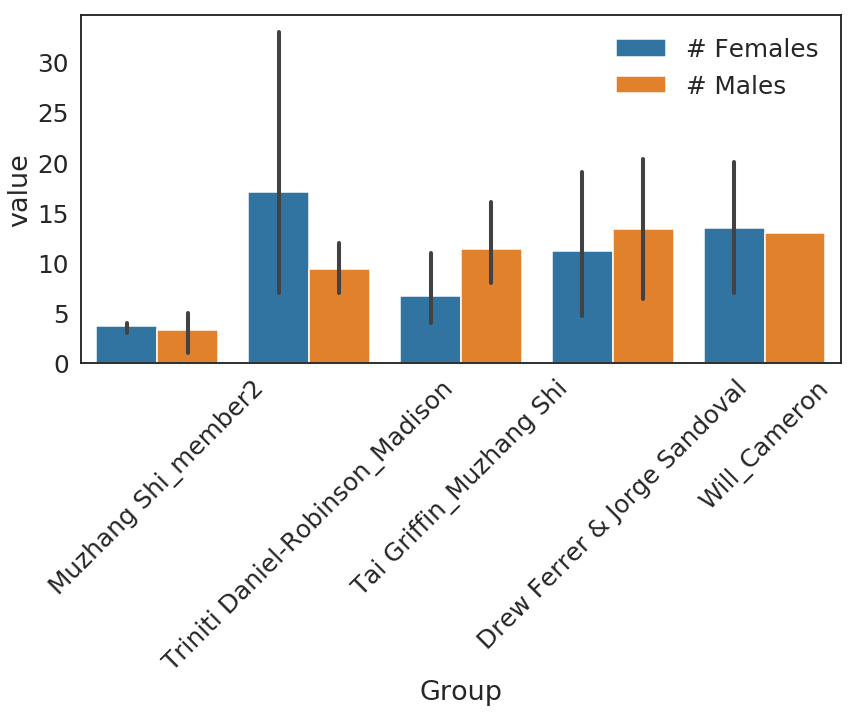

In [8]:
fig, ax = plt.subplots(figsize=(12, 10))
sns.barplot(data=master_df_molten, x='Group', y='value', hue='variable')
plt.xticks(rotation=45)
ax.legend(frameon=False)
fig.tight_layout()

fig.savefig('BISC104_Th_M_bar.pdf')

In [9]:
all_df = OrderedDict()
master_df = pd.DataFrame()
for sheet_name in sheet_names[1:]:
    df = pd.read_excel('../BISC104-Session01-Thursday-Morning.xlsx', sheet_name=sheet_name)
    df.columns = ['Day', 'Time',  '# Females', '# Males']
    df['Group'] = sheet_name
    df[['Time_start', 'Time_end']] = df['Time'].str.split('-', n=1, expand=True)
    df['Time_start'] = pd.to_datetime(df['Time_start'])#.astype(pd.Timestamp)
    df['Time_end'] = pd.to_datetime(df['Time_end'])#.astype(pd.Timestamp)
    df['delta'] = [datetime.timedelta.total_seconds(x) for x in df['Time_end'] - df['Time_start']]
    all_df[sheet_name] = df
    df['# Females'] = df['# Females']/df['delta'].astype(float)
    df['# Males'] = df['# Males']/df['delta']
    master_df = pd.concat([master_df, df], ignore_index=True)
    

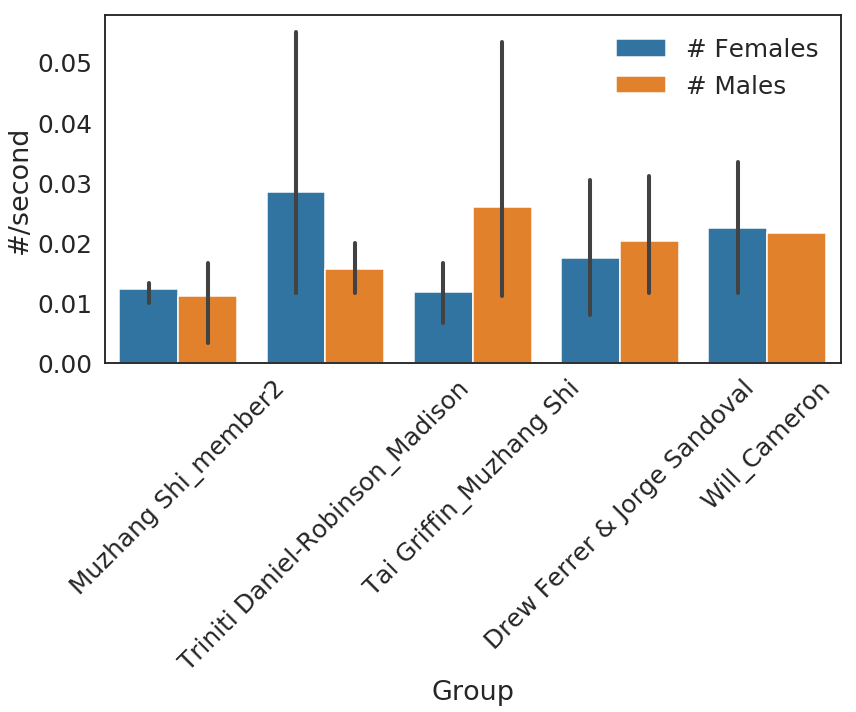

In [10]:
master_df_molten = pd.melt(master_df, id_vars=['Day', 'Time', 'Group'], value_vars=['# Females', '# Males'])
fig, ax = plt.subplots(figsize=(12, 10))
sns.barplot(data=master_df_molten, x='Group', y='value', hue='variable')
plt.xticks(rotation=45)
ax.set_ylabel('#/second')
fig.tight_layout()
ax.legend(frameon=False)
fig.savefig('BISC104_Th_M_bar_normalized.pdf')

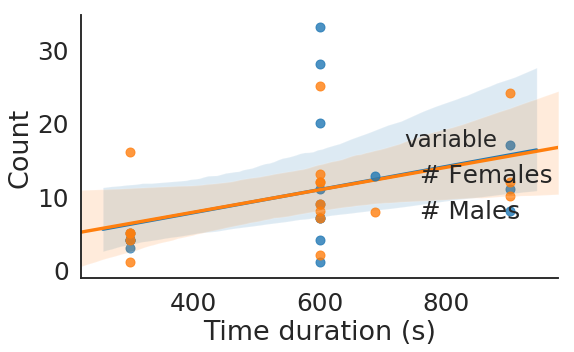

In [30]:
all_df = OrderedDict()
master_df = pd.DataFrame()
for sheet_name in sheet_names[1:]:
    df = pd.read_excel('../BISC104-Session01-Thursday-Morning.xlsx', sheet_name=sheet_name)
    df.columns = ['Day', 'Time',  '# Females', '# Males']
    df['Group'] = sheet_name
    df[['Time_start', 'Time_end']] = df['Time'].str.split('-', n=1, expand=True)
    df['Time_start'] = pd.to_datetime(df['Time_start'])#.astype(pd.Timestamp)
    df['Time_end'] = pd.to_datetime(df['Time_end'])#.astype(pd.Timestamp)
    df['delta'] = [datetime.timedelta.total_seconds(x) for x in df['Time_end'] - df['Time_start']]
    all_df[sheet_name] = df
    #df['# Females'] = df['# Females']/df['delta'].astype(float)
    #df['# Males'] = df['# Males']/df['delta']
    master_df = pd.concat([master_df, df], ignore_index=True)
master_df_molten = pd.melt(master_df, id_vars=['Day', 'Time', 'Group', 'delta'], value_vars=['# Females', '# Males'])

sns.lmplot(x="delta", y="value", hue="variable", data=master_df_molten, legend_out=True)

plt.xlabel('Time duration (s)')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('BISC104_Th_M_bar_timewise.pdf')

In [12]:
master_df_molten

,Day,Time,Group,delta,variable,value
0,W,10:30-10:35,Muzhang Shi_member2,300.0,# Females,4.0
1,W,10:35-10:40,Muzhang Shi_member2,300.0,# Females,3.0
2,W,10:40-10:45,Muzhang Shi_member2,300.0,# Females,4.0
3,W,10:00-10:10,Triniti Daniel-Robinson_Madison,600.0,# Females,7.0
4,W,11:35-11:45,Triniti Daniel-Robinson_Madison,600.0,# Females,11.0
5,W,16:03-16:13,Triniti Daniel-Robinson_Madison,600.0,# Females,33.0
6,T,18:20-18:25,Tai Griffin_Muzhang Shi,300.0,# Females,5.0
7,W,09:18-09:28,Tai Griffin_Muzhang Shi,600.0,# Females,4.0
8,W,10:30-10:45,Tai Griffin_Muzhang Shi,900.0,# Females,11.0
9,T,07:15-07:20,Drew Ferrer & Jorge Sandoval,300.0,# Females,4.0
